# Loan predictions

## Problem Statement

Minimizing the risk of loan defaults are a critical aspect or banking system risk management. Offering loans are the among the most important banking business functions. Thus, an accurate load eligibility prediction can minimize the risk of defaulting on loans and therefore increase banks’ profit. The bank aslo wants to automate the loan eligibility process based on customer details that are provided as online application forms are being filled.The dataset is [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### I will explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – dealing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data
6. Pipeline - used scikit-learn pipelines to combine multiple sequential steps
7. Deploy - deploy the pipeline in AWS
8. Conclusion

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level

## 2. Data Exploration
I do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### First, I will describe the dataset

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Based on the above description, we know missing data and skewness exists.

### I calculate the if there is a significantly different approval rate between people with credit history and without credit history.

In [4]:
df2 = df.groupby(['Credit_History', 'Loan_Status']).size().reset_index(name='count') 
print (df2)

   Credit_History Loan_Status  count
0             0.0           N     82
1             0.0           Y      7
2             1.0           N     97
3             1.0           Y    378


Based on the above calculation, people with credit history, approval rate is 378/(378+97)=0.80, people without a credit history, the approval rate is 7/(7+82)=0.08. 

### I will calculate if those who are approved have higher income ..

In [5]:
df2=df[['Loan_Status','ApplicantIncome','CoapplicantIncome']]
df2.groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome
Loan_Status,,
N,5446.078125,1877.807292
Y,5384.068720,1504.516398


Based on the calculation, approval and not approval people income are not significantly different.

### If applicants with higher education level are more likely to be approved.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


Text(0, 0.5, 'Percentage')

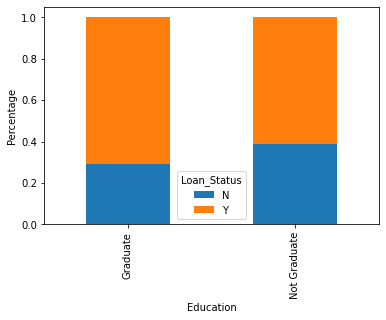

In [6]:
Edu = pd.crosstab(df['Education'], df['Loan_Status'])
print(Edu)
Edu.div(Edu.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

Based on the above calculation, Graduate has a higher approval rate

### Next, I will explore the distribution of applicant income and coapplicant income

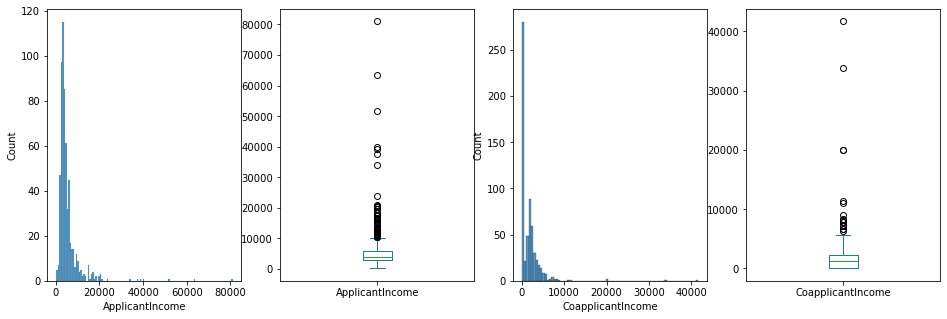

In [7]:
import seaborn as sns

plt.subplot(141)
sns.histplot(df['ApplicantIncome']);
plt.subplot(142)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.subplot(143)
sns.histplot(df['CoapplicantIncome']);
plt.subplot(144)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

From the above distribution, we can see that both applicant and co-applicant income is long tail, there are a lot of outliers.

### Look at the distribution of income segregated  by `Education`

Text(0.5, 0.98, '')

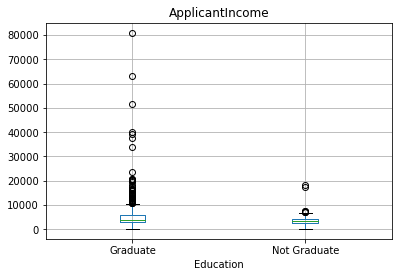

In [8]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

From the above chart, we can see graduate has higher income than not graduate.

### I explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [9]:
nominal_num=df.select_dtypes(exclude=['int64','float64'])
uniquenumber=nominal_num.nunique(axis=0)
nominal_num_dropID=nominal_num.drop(columns=['Loan_ID'])
print(nominal_num_dropID['Gender'].value_counts())
print(nominal_num_dropID['Married'].value_counts())
print(nominal_num_dropID['Dependents'].value_counts())
print(nominal_num_dropID['Education'].value_counts())
print(nominal_num_dropID['Loan_Status'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


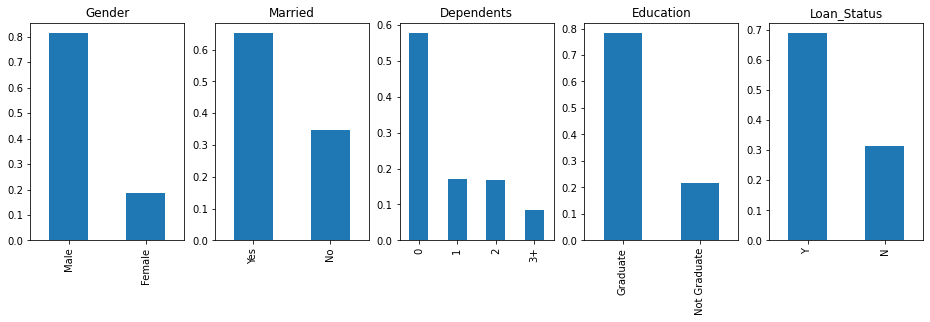

In [10]:
plt.subplot(151)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(16,4), title= 'Gender')

plt.subplot(152)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
                                                          
plt.subplot(153)
df['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(154)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(155)
df['Loan_Status'].value_counts(normalize=True).plot.bar(title= 'Loan_Status')


plt.show()

### It can be inferred from the above our observed data:
80% of loan applicants are male.<br>
Nearly 70% are married<br>
About 75% of loan applicants are graduates<br>
The loan has been approved for more than 65% of applicants.<br>

### I am curious why nearly 70% applicants are male, is there gender bias for load approval?

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


Text(0, 0.5, 'Percentage')

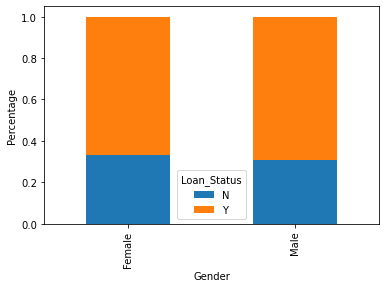

In [11]:
Gender = pd.crosstab(df['Gender'], df['Loan_Status'])
print(Gender)
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.ylabel('Percentage')

From the above chart, it seems no gender bias for loan approval.

### Let's see the correlation of different features

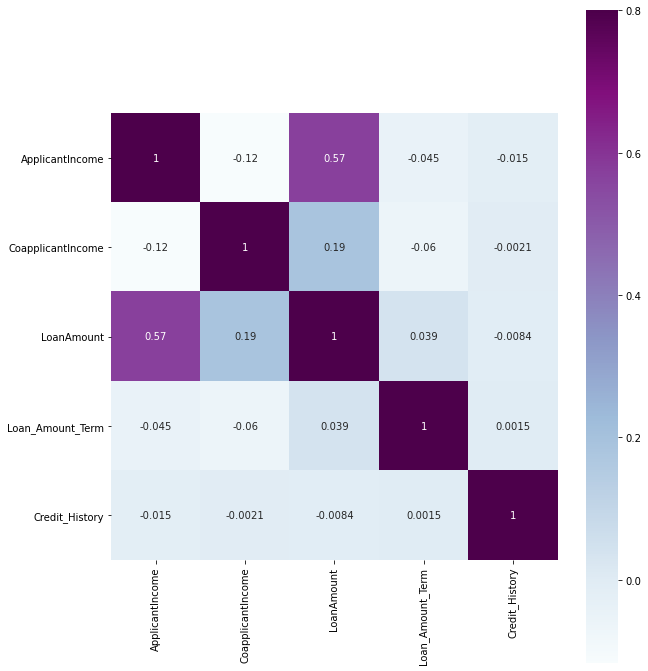

In [12]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

From the above heat map, we can see that applicant income has a strong relationship with the loan amount, the co-applicant income also has some relationship with the loan amount.

## 3. Data Cleaning

This step typically involves dealing with missing valuess. 

We have 13 features in total out of which we have 12 independent variables and 1 dependent variable i.e. Loan_Status. The Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are all categorical.
One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [13]:
df.shape
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There is missing data in gender, married, dependents, self_employed, loanamount, loan_amount_term and credit_history columns.

In [14]:
#Counting rows that have missing values somewhere:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

134

We have 614 rows of data totally, among them, 134 rows have missing data. In order to keep the original information, I will delete these rows, the 480 rows left.

### I drop the missing data.

In [15]:
# using dropna() function  
df_clean=df.dropna()
df_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


### I will check if the label is imbalanced

In [16]:
print(df_clean['Loan_Status'].value_counts())

Y    332
N    148
Name: Loan_Status, dtype: int64


### 69% applicants are approved, it is imbalance. Because I only have 480 rows of data,  I will use the over sampling method to deal with the imbalance.

<AxesSubplot:title={'center':'Loan_Status'}, xlabel='Loan_Status'>

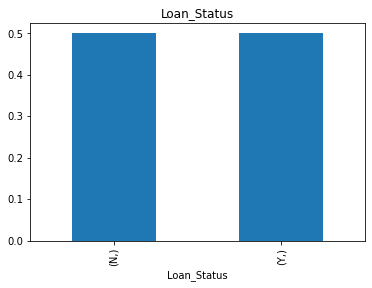

In [17]:
from imblearn.over_sampling import RandomOverSampler
x1=df_clean.drop("Loan_ID",axis=1)
X=x1.drop("Loan_Status",1)
y=df_clean[["Loan_Status"]]
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
y_over.value_counts(normalize=True).plot.bar(title= 'Loan_Status')

##  4. Feature Engineering
 In order to use machine learning algorithms, we change the categorical value to numerical values.

In [18]:
X_over['Dependents'].replace('3+',3,inplace=True)
y_over['Loan_Status'].replace('N', 0,inplace=True)
y_over['Loan_Status'].replace('Y', 1,inplace=True) 
X = pd.get_dummies(X_over)     # use one hot method to change all the categorical value to numerical values
y=y_over

I use One-Hot Encoding technique to treat categorical variables. It simply creates additional features based on the number of unique values in the categorical feature, it do not change the original information.

## 5. Building a Predictive Model
   Random forest algorithm will less affected by outliers, so I will use this algorithm whith gridsearch.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)


paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
Ran_Forest_cv = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
Ran_Forest_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",Ran_Forest_cv.best_params_)
print("accuracy :",Ran_Forest_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'max_depth': 17, 'n_estimators': 121}
accuracy : 0.8625462881326044


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred_grid_forest = Ran_Forest_cv.predict(x_cv)
print(classification_report(y_cv, pred_grid_forest))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        74
           1       0.88      0.85      0.86        59

    accuracy                           0.88       133
   macro avg       0.88      0.88      0.88       133
weighted avg       0.88      0.88      0.88       133



Based on the above data, we know recall for the approved loan is 0.88.

### I will check the overfitting of random forest 

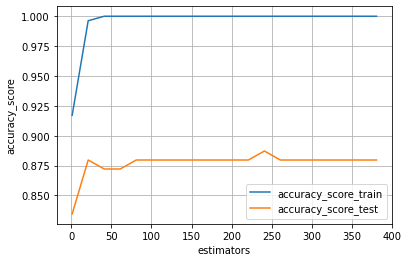

In [21]:
dt_height = []
training_errs = []
testing_errs = []


rf = RandomForestClassifier(n_estimators=1)
df = pd.DataFrame(columns=['n_estimators', 'accuracy_score_train', 'accuracy_score_test'])
for iter in range(20):
    rf.fit(x_train,y_train)
    y_train_predicted = rf.predict(x_train)
    y_test_predicted = rf.predict(x_cv)
    accuracy_score_train =accuracy_score(y_train, y_train_predicted)
    accuracy_score_test = accuracy_score(y_cv, y_test_predicted)
    
    # print("Iteration: {} Train accuracy_score: {} Test accuracy_score: {}".format(iter, accuracy_score_train, accuracy_score_test))
  
    dt_height.append(rf.n_estimators)
    training_errs.append(accuracy_score_train)
    testing_errs.append(accuracy_score_test)
    rf.n_estimators += 20

plt.plot(dt_height, training_errs, label="accuracy_score_train")
plt.plot(dt_height, testing_errs, label="accuracy_score_test")

plt.xlabel("estimators")
plt.ylabel("accuracy_score")
plt.grid(which='major', axis='both')

plt.legend()
plt.show()

When increase tree numbers, the accuracy score has no big change.

### Feature importance based on Decision Tree 

<AxesSubplot:>

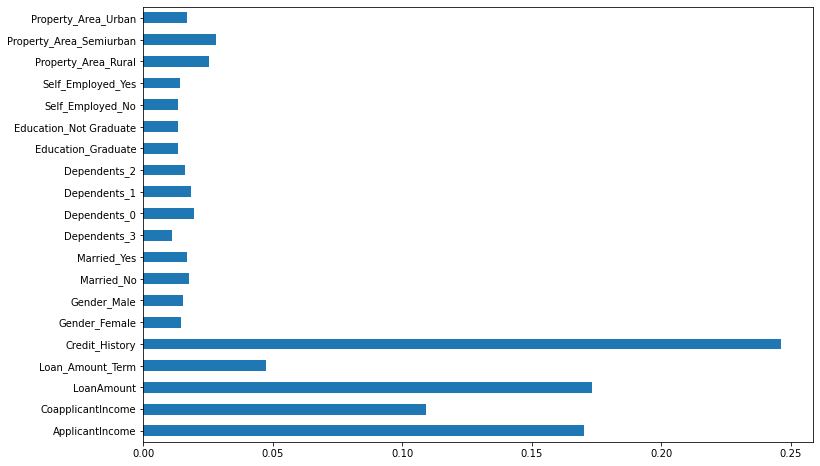

In [22]:
forest_model = RandomForestClassifier(random_state=1,max_depth=11,n_estimators=121)
forest_model.fit(x_train,y_train)
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

Feature importance based decision tree shows that the first important features are credit history, loan amount, applicant income, and co-applicant income.

### Feature importance based on feature permutation

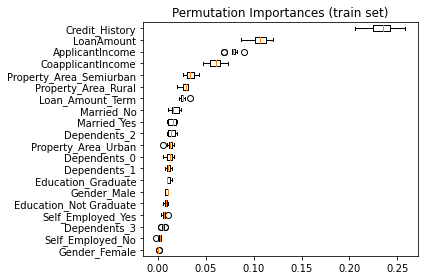

In [23]:
from sklearn.inspection import permutation_importance
model = RandomForestClassifier(random_state=1,max_depth=11,n_estimators=121)
model.fit(x_train,y_train)

result = permutation_importance(
    model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=x_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

Feature importance based feature permutation shows that the first important features are also credit history, loan amount, applicant income, and co-applicant income.

## 6. Using Pipeline
I transform feature engineering and modeling steps into Pipeline. 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [77]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# read the training data set
data = pd.read_csv('data.csv')

# top rows of the data
data.head()

# seperate the independent and target variables
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)
train_x = data.drop(columns=['Loan_Status'])
train_y = data['Loan_Status']
X=train_x 
y=train_y
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# import the BaseEstimator
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        df.dropna()
        df['Dependents'].replace('3+',3,inplace=True)
        return df

# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Loan_ID',
                                                                        'ApplicantIncome',
                                                                        'CoapplicantIncome',
                                                                        'LoanAmount',
                                                                        'Loan_Amount_Term'
                                                                       ]),
                                              ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender','Married','Education','Self_Employed','Property_Area'])
                                             ])  

# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestClassifier(random_state=1,max_depth=5,n_estimators=181))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
pred_grid_forest = model_pipeline.predict(x_cv)
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100
score_grid_forest

## 7. Deploy The model to cloud

In [ ]:
# import Flask and jsonify
from flask import Flask, jsonify, request
# import Resource, Api and reqparser
from flask_restful import Resource, Api, reqparse
import pandas as pd
import numpy
import pickle

# importing required libraries

from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

# seperate the independent and target variables

with open('model.pkl', 'rb') as f:
    model_pipeline3 = pickle.load(f)

#from sklearn import datasets
# predict target values on the training data

app = Flask(__name__)
api = Api(app)
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
model = pickle.load( open( "model.pkl", "rb" ) )


class Scoring(Resource):
    def post(self):
        json_data = request.get_json()
        df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()
        
        # getting predictions from our model.
        # it is much simpler because we used pipelines during development
        res = model.predict(df)
        # we cannot send numpt array as a result
        return res.tolist() 
# assign endpoint
api.add_resource(Scoring, '/scoring')
if __name__ == '__main__':
    app.run(debug=True, host='127.0.0.1', port=5000)

## 8. Conclusion

Credit history is the most inflencial variable on loan approval. <br>
The approval and not approval people income are not significantly different. <br>
Graduate people has a higher approval rate.  <br>
I used  Random Forest model(after grid search), accuracy is 86%, Recall is 88%. <br>
I also transform feature engineering and modeling steps into Pipeline, deploy it. It will be convenient for future use. <br>